In [14]:
import numpy as np
import matplotlib.pyplot as plt

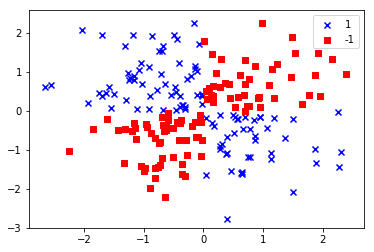

In [15]:
np.random.seed(0)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:,0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1], c ='r', marker = 's', label = '-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

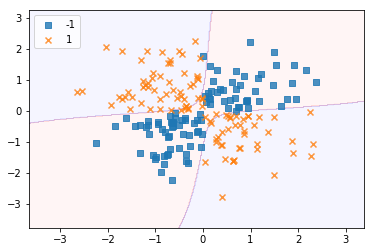

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.10, C = 10.0)
svm.fit(x_xor, y_xor)
plot_decision_region(x_xor, y_xor, svm)
plt.legend(loc = 'upper left')
plt.show()

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y= iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

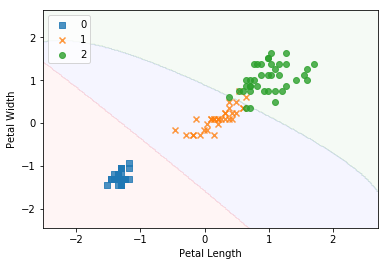

In [34]:
svm  = SVC(kernel = 'rbf', random_state=0, gamma = 0.2, C = 1.0)
svm.fit(x_train_std, y_train)
plot_decision_region(x_train_std, y_train, svm)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()